## GURHAR KHALSA DATA SCIENCE PROJECT

### Table of contents

* [Objective](#objective)
* [Data source](#data-source)
* [Cleaning NAN values](#cleaning-nan)
* [Pairplots](#pairplots)
* [Class imbalance](#illustrate-class-imbalance)
* [Summary of Exploratory Data Analysis](#eda-summary)
* [Baseline models](#baseline-models)
* [Feature importance and selection](#feat-imp-select)
* [Finding over and undersampling ratios to improve class imbalance issues](#ideal-auc-ratios)
* [Testing extracted ratios](#testing-ratios)
* [Improvement in AUC](#auc-improved)
* [Experimenting with ensembles](#ensemble-experiments)
* [Conclusions](#conclusions)

<a id='objective'></a>
### Project Goal: Stroke prediction/classification
* The primary goal of this project will be to accurately classify whether a person will have a stroke. I initially had plans to perform regression on one of the continuous variables, but opted to focus soley on classification given that a class imbalance issue, which I will discuss more, came to light and classification proved to need more attention
* The motivation behind this project is the obvious medical importance of data science based diagnostics. Additionally, getting practice with classification, where data science practice is another motivator for this project.

<a id='data-source'></a>
#### Data source
* This dataset comes from kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
* As indicated by the name of the dataset, this dataset is for stroke prediction
* There are 11 attributes per data object (not including id). With 8 categorical attributes (6 of which appear to be binary/boolean) and 3 numerical attributes.
* Here is the summary provided on kaggle:

    1) id: unique identifier
    
    2) gender: "Male", "Female" or "Other"
    
    3) age: age of the patient
    
    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    
    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    
    6) ever_married: "No" or "Yes"
    
    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    
    8) Residence_type: "Rural" or "Urban"

    9) avg_glucose_level: average glucose level in blood
    
    10) bmi: body mass index
    
    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    
    12) stroke: 1 if the patient had a stroke or 0 if not
    
    *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
    
* The data is stored in a single csv and has 5110 rows, each corresponding to a data object/person
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<a id='cleaning-nan'></a>
#### Checking for nan values

In [4]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Nan values present in the bmi column

In [5]:
df.bmi.isnull().sum()

201

In [6]:
len(df.bmi)

5110

In [7]:
df.bmi.mean()

28.893236911794673

In [8]:
df.bmi.median()

28.1

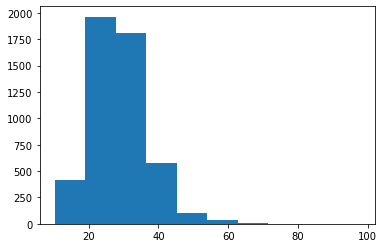

In [9]:
plt.hist(df.bmi);

It appears that the bmi column contains 201 out of 5110 nan values. This column is roughly normally distributed with mean roughly equal to median. I will use the mean to impute missing values
#### Imputing NAN with mean

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) #imputation
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [11]:
len(df.bmi)

5110

<a id='pairplots'></a>
#### Plotting a scatter matrix to get an idea of whether there are correlations in the dataset

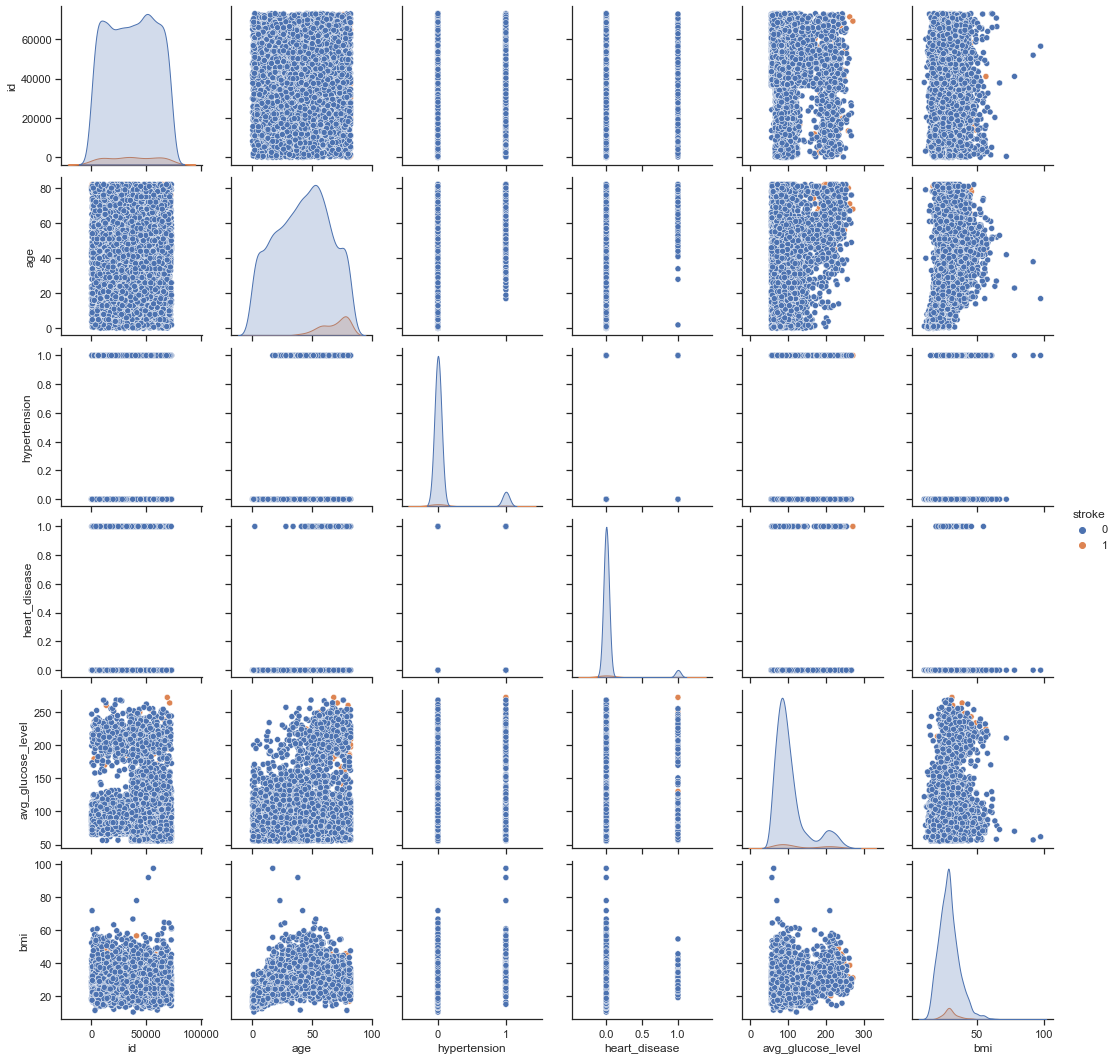

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="stroke");


### Attempt at finding more patterns in standardized data
No obvious associations present, but maybe standardization or normalization will tease them out?

In [13]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [14]:
marriage_dict = {"Yes": 1, "No": 0} # Encoding categoricals
rural_dict = {"Rural":0, "Urban":1}
df['Residence_type'] = df['Residence_type'].map(rural_dict)
df['ever_married'] = df['ever_married'].map(marriage_dict)
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046    Male  67.0             0              1             1   
1  51676  Female  61.0             0              0             1   
2  31112    Male  80.0             0              1             1   
3  60182  Female  49.0             0              0             1   
4   1665  Female  79.0             1              0             1   

       work_type  Residence_type  avg_glucose_level        bmi  \
0        Private               1             228.69  36.600000   
1  Self-employed               0             202.21  28.893237   
2        Private               0             105.92  32.500000   
3        Private               1             171.23  34.400000   
4  Self-employed               0             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [15]:
numerical_df = df[["age", "hypertension", "heart_disease", "ever_married",
                       "Residence_type", "avg_glucose_level", "bmi", "stroke"]]


scaler = preprocessing.StandardScaler().fit(numerical_df)
scaled_numerical = scaler.transform(numerical_df) #scaling the dataframe


In [16]:
scaled_numerical = pd.DataFrame(scaled_numerical)
scaled_numerical = pd.DataFrame({
    "age" : scaled_numerical[0],
    "hypertension" : scaled_numerical[1],
    "heart_disease" : scaled_numerical[2],
    "ever_married" : scaled_numerical[3],
    "Residence_type" : scaled_numerical[4],
    "avg_glucose_level" : scaled_numerical[5],
    "bmi" : scaled_numerical[6],
    "stroke" : scaled_numerical[7]
    
})
scaled_numerical

age  hypertension  heart_disease  ever_married  Residence_type  \
0     1.051434     -0.328602       4.185032      0.723884        0.984080   
1     0.786070     -0.328602      -0.238947      0.723884       -1.016178   
2     1.626390     -0.328602       4.185032      0.723884       -1.016178   
3     0.255342     -0.328602      -0.238947      0.723884        0.984080   
4     1.582163      3.043196      -0.238947      0.723884       -1.016178   
...        ...           ...            ...           ...             ...   
5105  1.626390      3.043196      -0.238947      0.723884        0.984080   
5106  1.670617     -0.328602      -0.238947      0.723884        0.984080   
5107 -0.363842     -0.328602      -0.238947      0.723884       -1.016178   
5108  0.343796     -0.328602      -0.238947      0.723884       -1.016178   
5109  0.034205     -0.328602      -0.238947      0.723884        0.984080   

      avg_glucose_level           bmi    stroke  
0              2.706375  1.001234e+00  4.418381  
1              2.121559  1.384666e-15  4.418381  
2             -0.005028  4.685773e-01  4.418381  
3              1.437358  7.154182e-01  4.418381  
4              1.501184 -6.357112e-01  4.418381  
...                 ...           ...       ...  
5105          -0.494658  1.384666e-15 -0.226327  
5106           0.420775  1.442949e+00 -0.226327  
5107          -0.511443  2.217363e-01 -0.226327  
5108           1.328257 -4.278451e-01 -0.226327  
5109          -0.460867 -3.498953e-01 -0.226327  

[5110 rows x 8 columns]

### Scatter matrix of stardized data

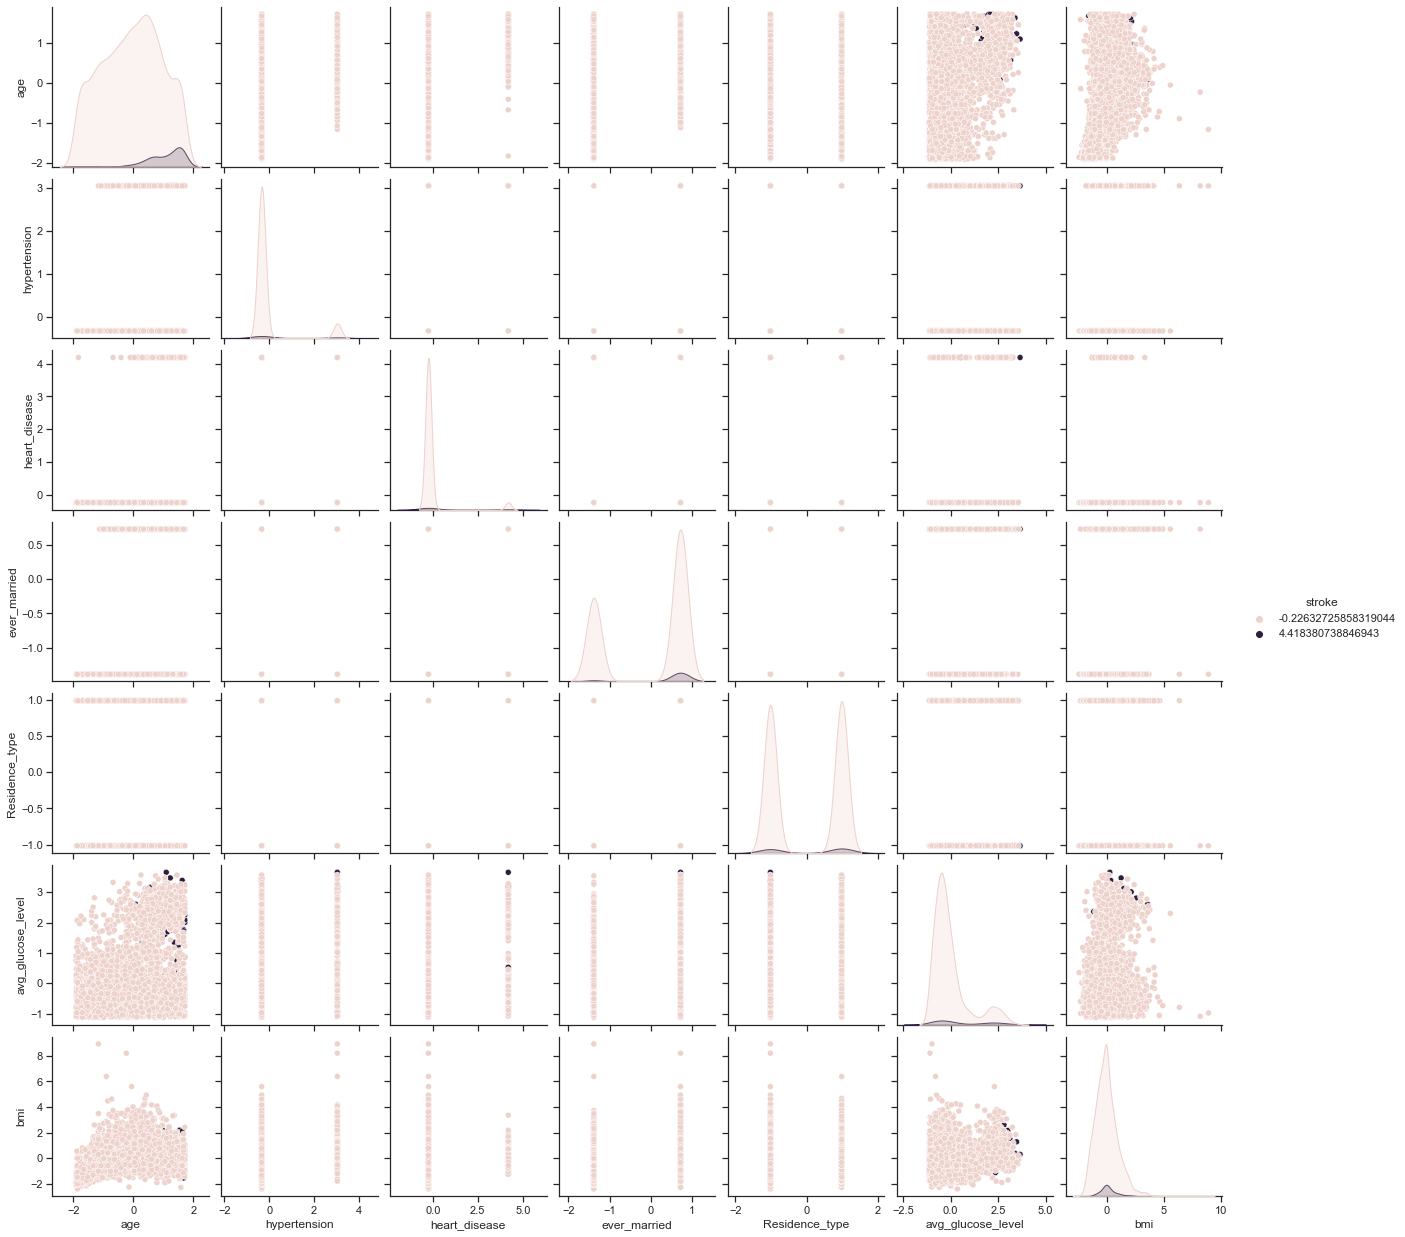

In [17]:
sns.pairplot(scaled_numerical, hue="stroke");

#### Above is a scatter matrix of all the numerical attributes after they have been standarized. 
* I did this to get an idea of whether standardized data would illuminate patterns that the regular data wouldnt. But this did not seem to be the case

### Separate scatter matrices for stroke
* I plotted stroke and no stroke separately because too many data objects occluded any discernable pattern in previous scatter matrices where stroke and no stroke patients were just given different colors in the same matrix

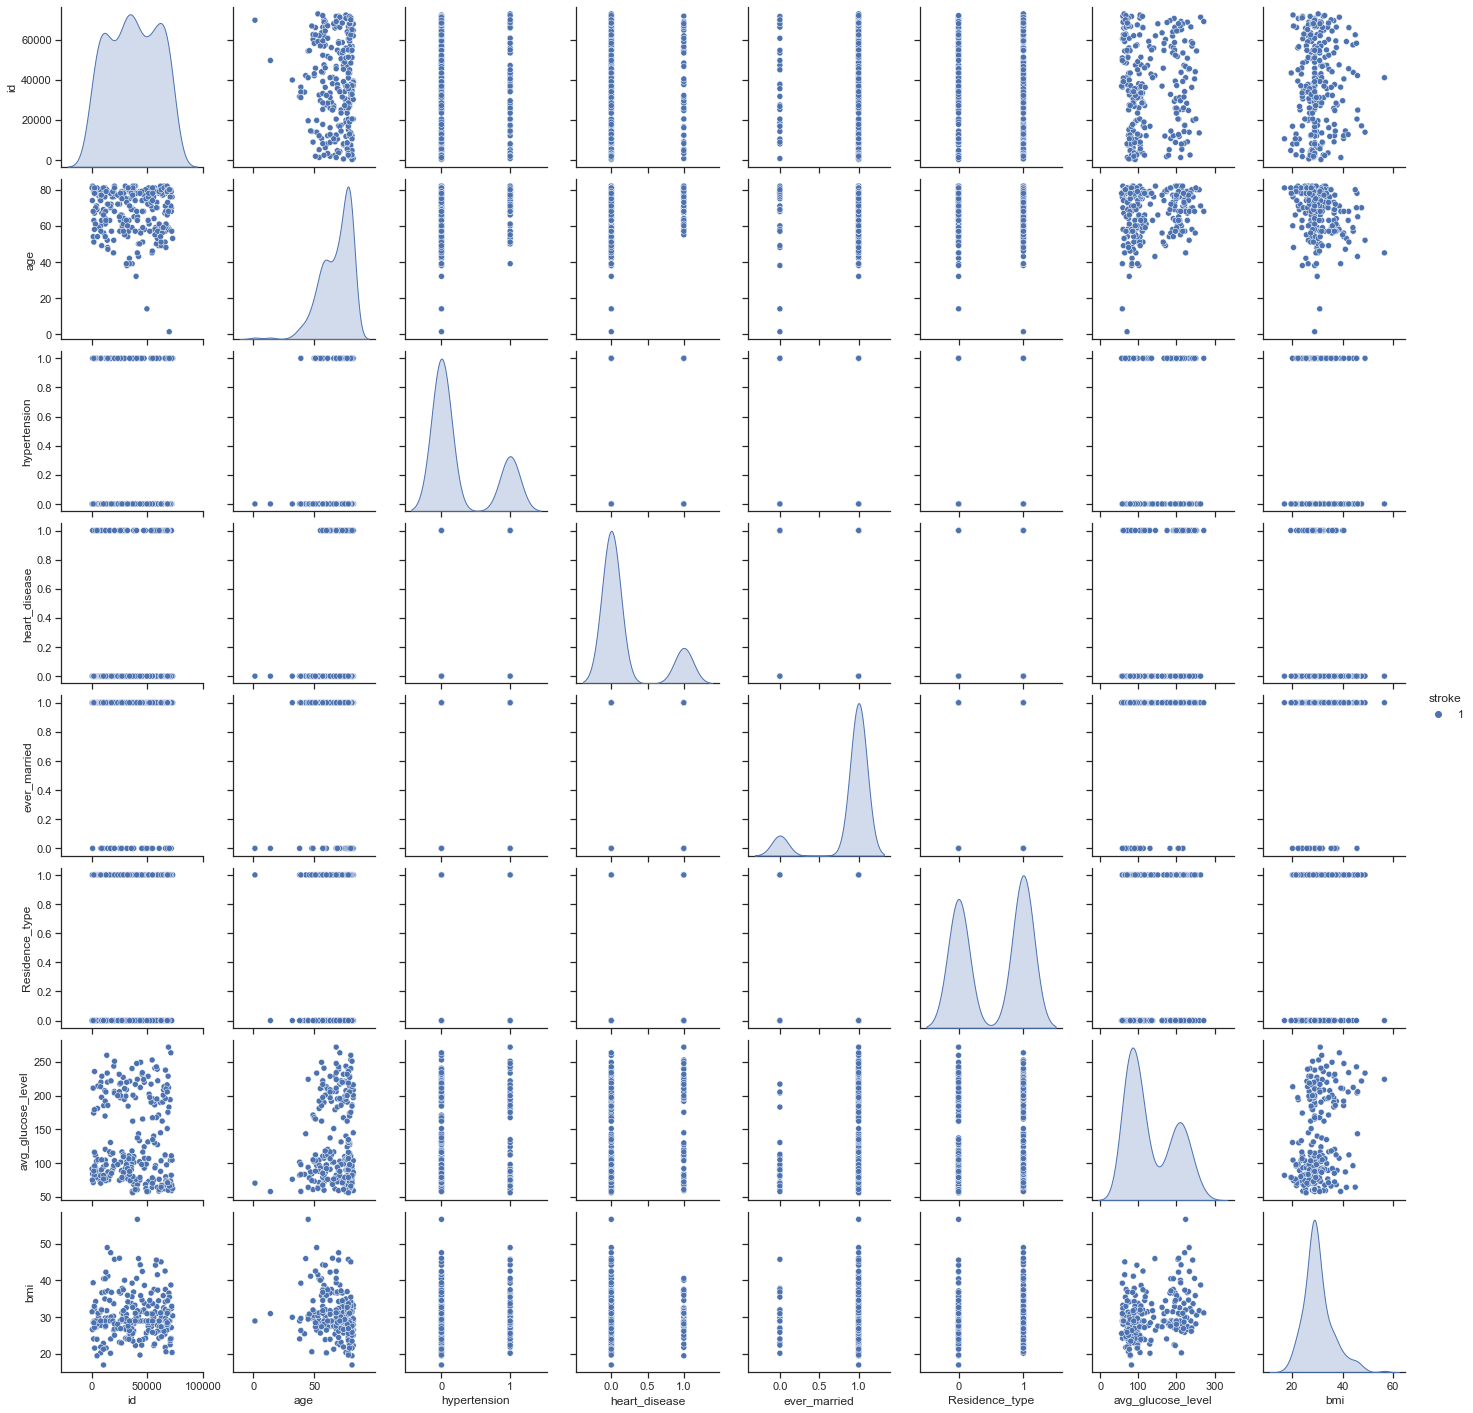

In [18]:
stroke = df[df.stroke == 1] # stroke patient scatter matrix
no_stroke = df[df.stroke == 0]
sns.pairplot(stroke, hue="stroke");


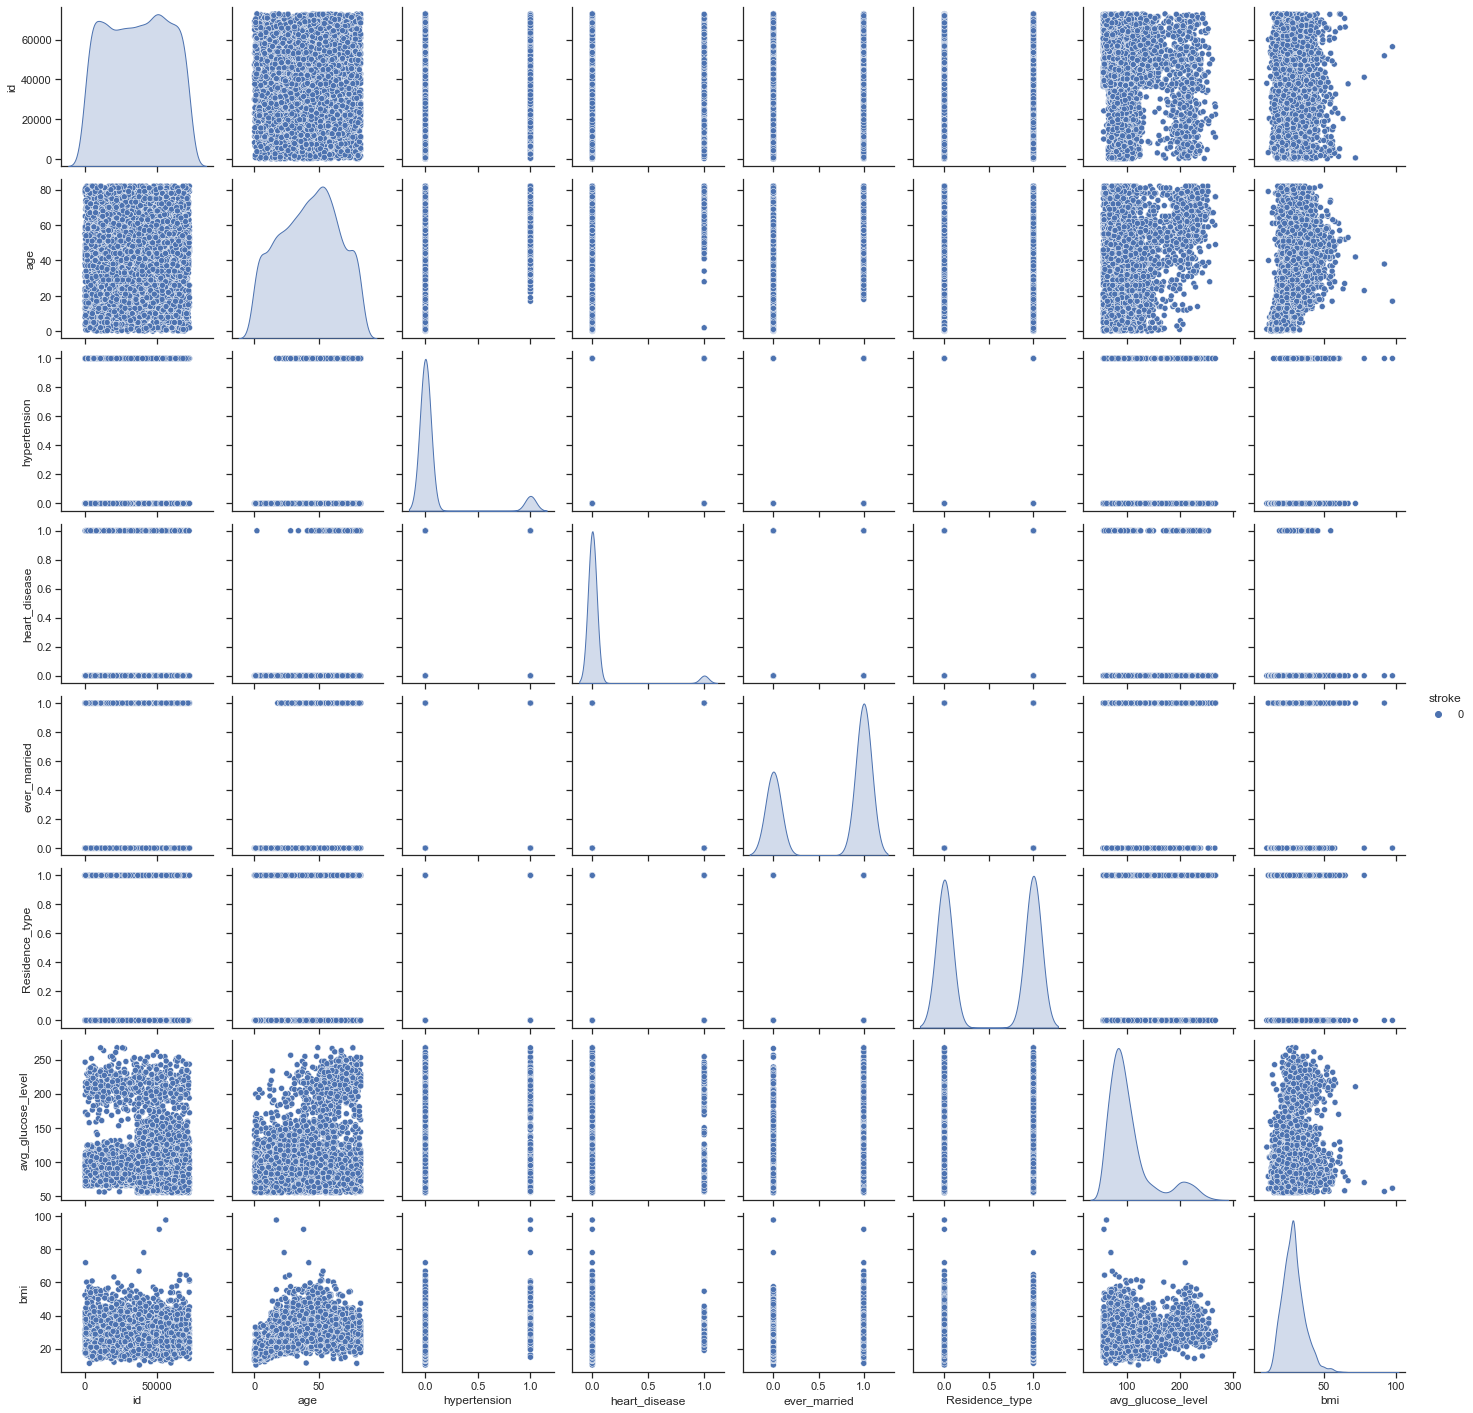

In [19]:
sns.pairplot(no_stroke, hue="stroke"); # non-stroke patient scatter matrix

##### Obvious association patterns are still not present
<a id='illustrate-class-imbalance'></a>
#### Checking for class imbalance in stroke column

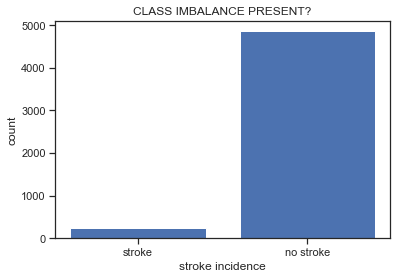

In [20]:
x = ["stroke", "no stroke"]
y = [len(df.stroke[df.stroke == 1]), len(df.stroke[df.stroke == 0])] # separating stroke and no stroke patients for barplot
plt.xlabel("stroke incidence")
plt.ylabel("count")
plt.title("CLASS IMBALANCE PRESENT?")
plt.bar(x, y);

<a id='eda-summary'></a>
### Summary/Conclusions of EDA:
* Standardizing was not super successful for finding obvious association patterns
* That being said, there do appear to be two dimensional clusters for (bmi, avg_glucose), (age, avg_glucose). This suggests that there could be structure in the data present for a model to pick up on.
* Age, bmi and avg_glucose all appear somewhat normally distributed
* Standardizing/normalizing may be more useful later on when performing classification
* A large class imbalance in the stroke column is present. Metrics besides basic accuracy must be considered when evaluating the results of classification. Over and undersampling may be necessary
* When plotting scatter matrices separately for the stroke vs no stroke data objects, we get different scatter patterns in the (age, bmi) plot, and pretty different distributions for the age column. The average glucose levels for patients with strokes appears to be more bi modal as well. This also suggests useful structure in the data for the classifier to pick up on

##### Utilizing a correlation matrix to double check after scatterplots didn't show obvious associations

In [21]:
df.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
ever_married       0.013690  0.679125      0.164243       0.114644   
Residence_type    -0.001403  0.014180     -0.007913       0.003092   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   ever_married  Residence_type  avg_glucose_level       bmi  \
id                     0.013690       -0.001403           0.001092  0.002999   
age                    0.679125        0.014180           0.238171  0.325942   
hypertension           0.164243       -0.007913           0.174474  0.160189   
heart_disease          0.114644        0.003092           0.161857  0.038899   
ever_married           1.000000        0.006261           0.155068  0.335705   
Residence_type         0.006261        1.000000          -0.004946 -0.000120   
avg_glucose_level      0.155068       -0.004946           1.000000  0.168751   
bmi                    0.335705       -0.000120           0.168751  1.000000   
stroke                 0.108340        0.015458           0.131945  0.038947   

                     stroke  
id                 0.006388  
age                0.245257  
hypertension       0.127904  
heart_disease      0.134914  
ever_married       0.108340  
Residence_type     0.015458  
avg_glucose_level  0.131945  
bmi                0.038947  
stroke             1.000000

* ever_married and bmi have .33 correlation coefficient, bmi and age have .32, ever mairried and age have .67

* I will keep this in mind and may drop one (or more) of these predictors 

* I may drop ever married to avoid collinearity effects on the model

## Modeling approach
* I will use the extracted feature importance of a random forrest and drop less relevant factors, as well as drop factors that cause collinearity
* In light of the class imbalance, I will use the smote library for an over and under sampling combination
* Also in light of the class imbalance, AUC and recall/precision will be metrics of interest besides just plain classifier accuracy
* Will use cross validation to extract the best over/under sampling ratios with respect to AUC score
* Once I have an idea of how to fix the class imbalance and which features are most important, I will compare results of random forrest, with other models (ie. logistic regression, LDA, QDA and KNN ) 


<a id='baseline-models'></a>

#### I will first use a random forest as a baseline
* Random forests are good for tabular data and for extracting feature importance. 
* Combined information from the correlation coefficients and the feature importance from the random forest will aid me in feature selection




#### Prepping the data (more cleaning)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

df.gender[df.gender == 'Other'].count()

1

In [23]:
# Just one 'other' gender value so I will drop it

df = df[df.gender != 'Other']
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [24]:
gender_dict = {"Male": 1, "Female": 0}
df['gender'] = df['gender'].map(gender_dict)
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

       work_type  Residence_type  avg_glucose_level        bmi  \
0        Private               1             228.69  36.600000   
1  Self-employed               0             202.21  28.893237   
2        Private               0             105.92  32.500000   
3        Private               1             171.23  34.400000   
4  Self-employed               0             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [25]:
# Gotta deal with smoking_status and work_type now
print(df.work_type.unique())
print(df.smoking_status.unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [26]:
# dummy variables for work_type and smoking_status

# https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

# pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['work_type'], prefix='work_type')],axis=1)
df = pd.concat([df,pd.get_dummies(df['smoking_status'], prefix='smokes')],axis=1)
df.drop(['work_type'],axis=1, inplace=True)
df.drop(['smoking_status'],axis=1, inplace=True)

df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

   Residence_type  avg_glucose_level        bmi  stroke  work_type_Govt_job  \
0               1             228.69  36.600000       1                   0   
1               0             202.21  28.893237       1                   0   
2               0             105.92  32.500000       1                   0   
3               1             171.23  34.400000       1                   0   
4               0             174.12  24.000000       1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  smokes_Unknown  smokes_formerly smoked  \
0                   0               0                       1   
1                   0               0                       0   
2                   0               0                       0   
3                   0               0                       0   
4                   0               0                       0   

   smokes_never smoked  smokes_smokes  
0                    0              0  
1                    1              0  
2                    1              0  
3                    0              1  
4                    1              0

In [27]:
y = df.stroke
X = df.drop('stroke', axis=1)
X = X.drop('id', axis=1)
min_max_scaler = MinMaxScaler() # min max normalization because it keeps categorical binaries as 0 and 1
# scaled_X = X
scaled_ = min_max_scaler.fit_transform(X)
X.loc[:,:] = scaled_

In [28]:
# train test split
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Baseline model

In [31]:
from sklearn.metrics import roc_auc_score
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train, y_train)
predicted_stroke = rf_clf.predict(df_test)
print(classification_report(y_test, predicted_stroke))
print("auc: ", roc_auc_score(y_test, rf_clf.predict_proba(df_test)[:,1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

auc:  0.7986055107526882


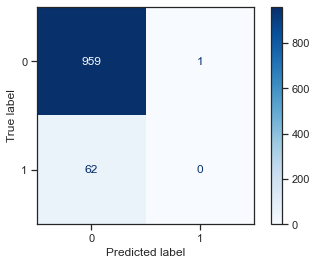

In [32]:
plot_confusion_matrix(rf_clf, df_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

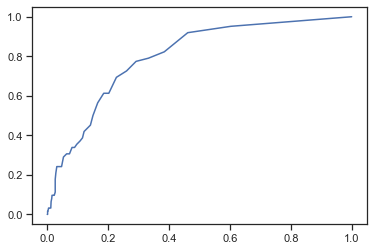

In [33]:
fp, tp, _ = metrics.roc_curve(y_test, rf_clf.predict_proba(df_test)[:,1])
plt.plot(fp,tp);

In [34]:
from sklearn.metrics import roc_auc_score

rf_clf = RandomForestClassifier(class_weight='balanced') # class_weight='imbalanced' parameter is supposed to help with class imbalance
rf_clf.fit(df_train, y_train)
predicted_stroke = rf_clf.predict(df_test)

# draw roc curve
print("auc: ", roc_auc_score(y_test, rf_clf.predict_proba(df_test)[:,1]))


print(classification_report(y_test, predicted_stroke))

auc:  0.7874915994623656
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



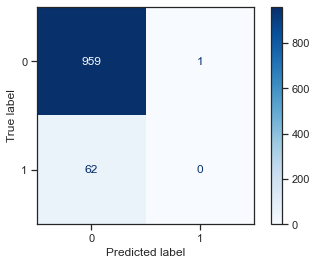

In [35]:
plot_confusion_matrix(rf_clf, df_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

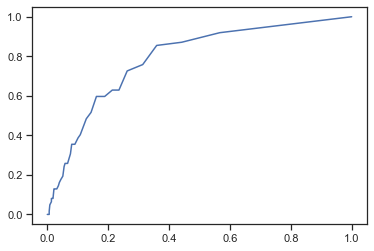

In [36]:
fp1, tp1, _ = metrics.roc_curve(y_test, rf_clf.predict_proba(df_test)[:,1])
plt.plot(fp1,tp1);

### Baseline results (high accuracy is missleading)
* The model directly above is a first attempt at addressing the class imbalance by using class wieghts with the additional class_weight='balanced' parameter. AUC is actually no better with the inclusion of this parameter


#### Class imbalance is messing with things
* This issue is highlighted by the confusion matrix analyses for both models. The models virtually always guess for the majority class. And the resulting high accuracy is actually missleading
* While the baseline models have high accuracy, they have horrible precision and recall. This means potential strokes are slipping through the cracks
* Lets see if some other methods can improve the AUC score.

<a id='feat-imp-select'></a>
### Feature importance extracted from baseline

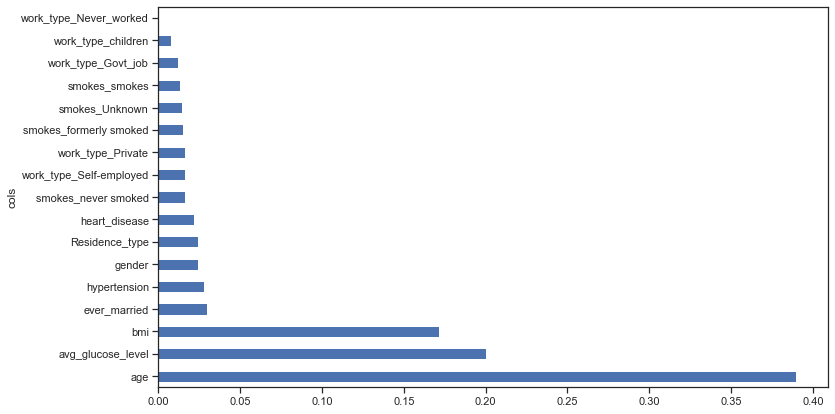

In [37]:
def rf_feat_imp(m, df): # functions to find and plot feature importance
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

fi = rf_feat_imp(rf_clf, df_train)
plot_fi(fi);

### Dropping less relevant features
* Dropped ever_married to reduce collinearity effects
* Also dropped bmi, gender and residence type because logistic and lda models showed that they were not significant.
* This provides the benefit of a simpler model as well, with just four predictors

In [38]:
X = X[['age','avg_glucose_level','hypertension','heart_disease']] # Feature selection
X.head()

age  avg_glucose_level  hypertension  heart_disease
0  0.816895           0.801265           0.0            1.0
1  0.743652           0.679023           0.0            0.0
2  0.975586           0.234512           0.0            1.0
3  0.597168           0.536008           0.0            0.0
4  0.963379           0.549349           1.0            0.0

### Taking a shot at over and under sampling to fix class imbalance

In [39]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


<a id='ideal-auc-ratios'></a>
### Cross validation to find ideal over and under sampling ratios
* I will now use cross validation to extract the ideal over and under sampling ratios in terms of AUC.
* The motivation behind this is that cross validation can be good for extracting hyper-parameters
* I will then use these extracted ratios to train new models

In [43]:
def find_optimal_ratio(model,k): # Given model and k folds, use cross validation to find best over/under sampling ratio combo
    xs = []
    ys = []
    zs = []
    best_auc = 0
    best_under = 0
    best_over = 0
    for i in range(1, 31):
        for j in range(1, 31):
            ratio_over = i/31
            ratio_under = j/31
            try:
                over = SMOTE(sampling_strategy=ratio_over)
                under = RandomUnderSampler(sampling_strategy=ratio_under)
                steps = [('over', over), ('under', under)]                        
                pipeline = Pipeline(steps=steps)
                auc = 0
                a = 0
                kf = StratifiedKFold(n_splits=k) ## Cross validation
                for train_index, test_index in kf.split(X, y):
                    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:] 
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                    X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train) # over sampling the training data

                    m = model
                    m.fit(X_train_bal, y_train_bal)
                    a = roc_auc_score(y_test, m.predict_proba(X_test)[:,1])
                    auc += a
                
                auc = auc/k # averaging the auc score for a models crossval auc
                if auc > best_auc:
                    best_auc = auc
                    best_over = ratio_over
                    best_under = ratio_under
                    best_m = m # best model trained on ideal ratio
                xs.append(ratio_over)
                ys.append(auc)
                zs.append(ratio_under)
            except Exception as e:
                continue
    
    return np.array(xs), np.array(ys), np.array(zs), (best_auc, best_over, best_under), best_m

max_auc = 0
params = 0
auc_vect = []
ratio_over = []
ration_under = []
ratios_o = []
ratios_u = []
vect_of_aucs = []
models = []
bestModel = None

for model in [LinearDiscriminantAnalysis(), 
              LogisticRegression(), 
              QuadraticDiscriminantAnalysis(),
              KNeighborsClassifier(n_neighbors=15, n_jobs=-1), 
              RandomForestClassifier(max_depth=15)]:
    
    ratio_over, aucs, ratio_under, bests, m = find_optimal_ratio(model, 5)  
    print(f"model {m}, had best auc: {bests[0]} with over_ratio = {bests[1]} and under_ratio = {bests[2]}")
    if bests[0] > max_auc:
        max_auc = bests[0]
        params = bests
        auc_vect = aucs
        ratio_over = ratio_over
        ratio_under = ratio_under
        bestModel = m
    ratios_o.append(ratio_over)
    ratios_u.append(ratio_under)
    vect_of_aucs.append(aucs)
    models.append(m)
print(f"Best model was {bestModel}")

model LinearDiscriminantAnalysis(), had best auc: 0.8440863357688755 with over_ratio = 0.16129032258064516 and under_ratio = 0.6774193548387096
model LogisticRegression(), had best auc: 0.8441249685059209 with over_ratio = 0.16129032258064516 and under_ratio = 0.8064516129032258
model QuadraticDiscriminantAnalysis(), had best auc: 0.8272716049382716 with over_ratio = 0.25806451612903225 and under_ratio = 0.7096774193548387
model KNeighborsClassifier(n_jobs=-1, n_neighbors=15), had best auc: 0.8260985554715713 with over_ratio = 0.06451612903225806 and under_ratio = 0.7096774193548387
model RandomForestClassifier(max_depth=15), had best auc: 0.8076201814058956 with over_ratio = 0.0967741935483871 and under_ratio = 0.6129032258064516
Best model was LogisticRegression()


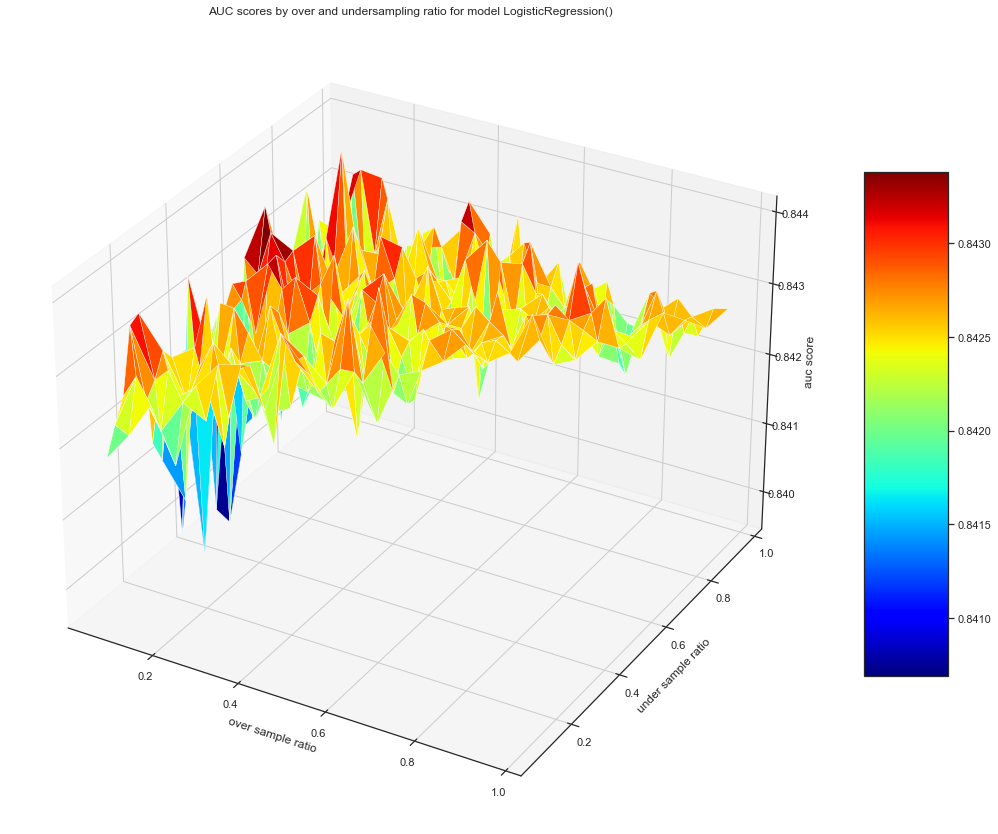

Best over sample ratio: 0.16129032258064516. Best under sample ratio 0.8064516129032258


In [44]:
fig = plt.figure(figsize=(14,14)) # Setting up a 3d plot
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratio_over, ratio_under, auc_vect, cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {bestModel}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()
print(f"Best over sample ratio: {params[1]}. Best under sample ratio {params[2]}")

### 3d plots for the other models:

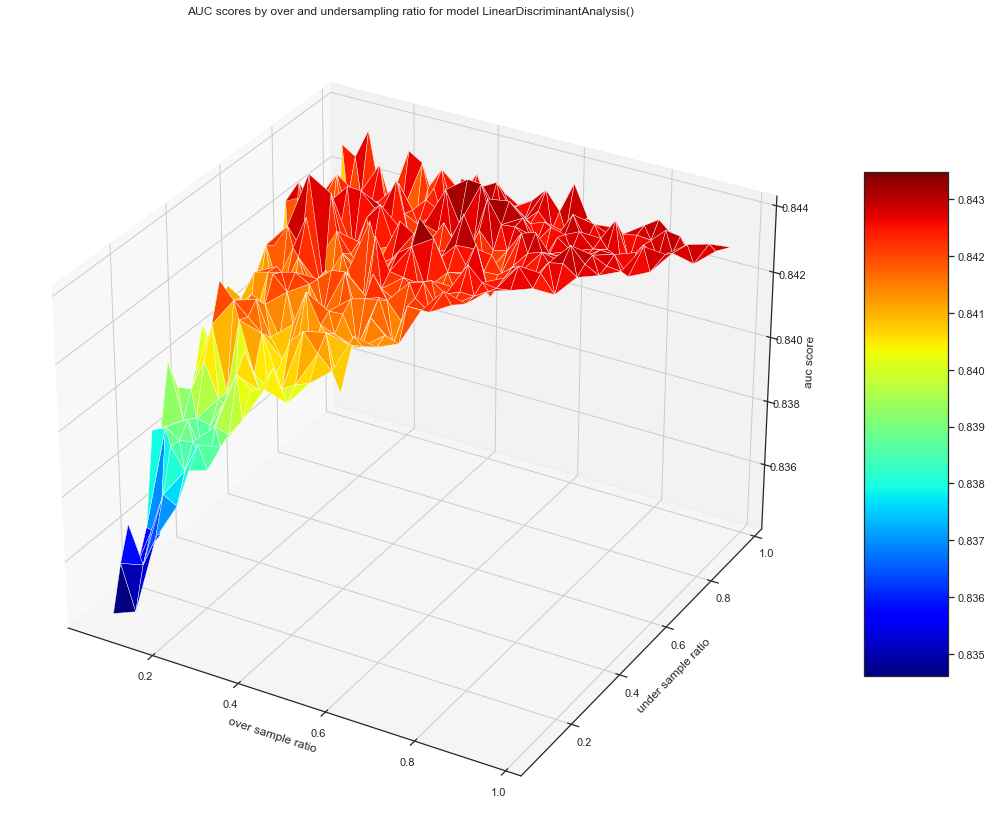

In [45]:
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratios_o[0], ratios_u[0], vect_of_aucs[0], cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {models[0]}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()


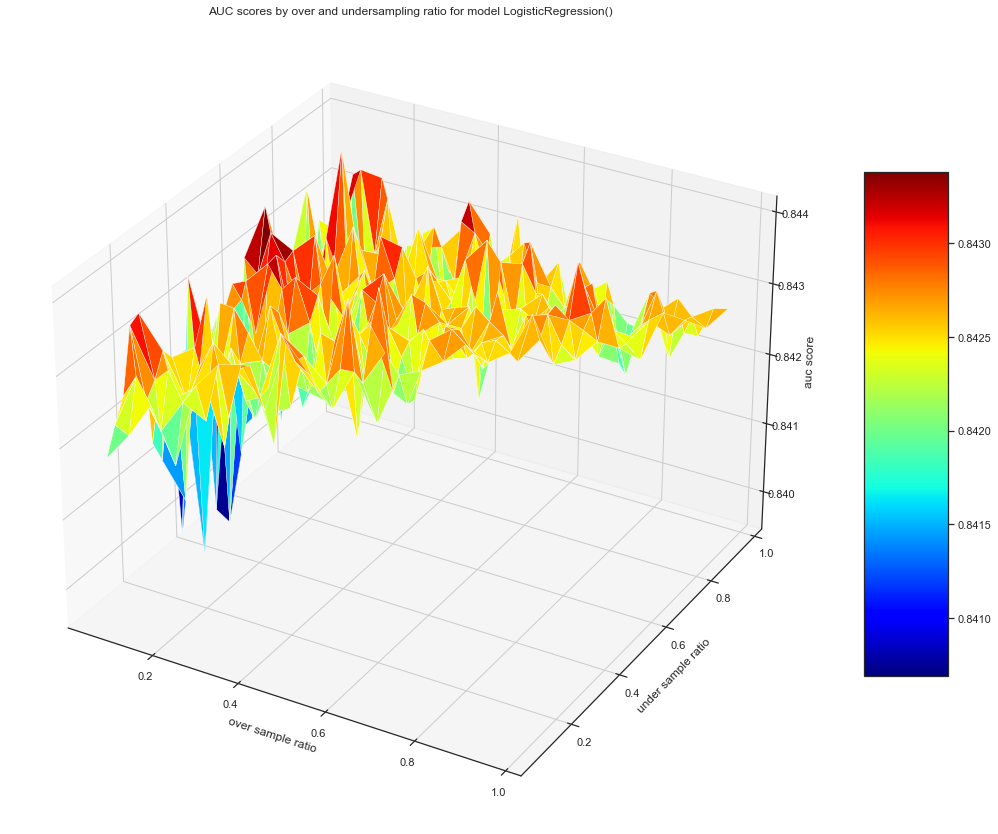

In [46]:
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratios_o[1], ratios_u[1], vect_of_aucs[1], cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {models[1]}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()

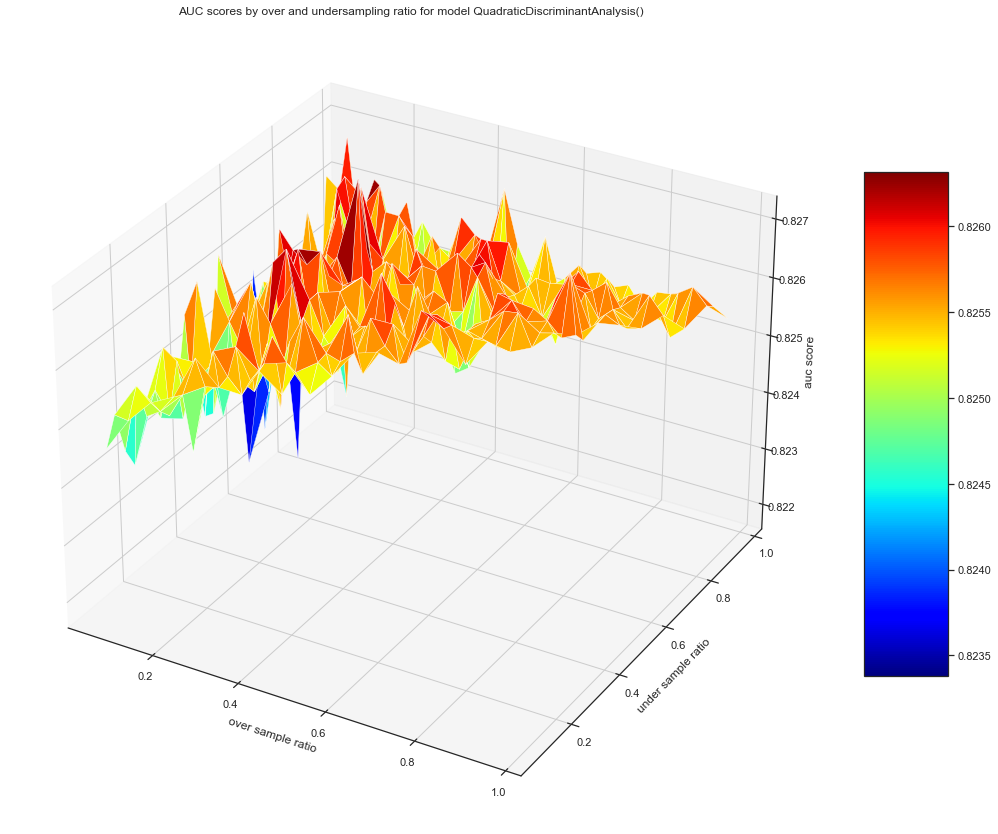

In [47]:
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratios_o[2], ratios_u[2], vect_of_aucs[2], cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {models[2]}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()

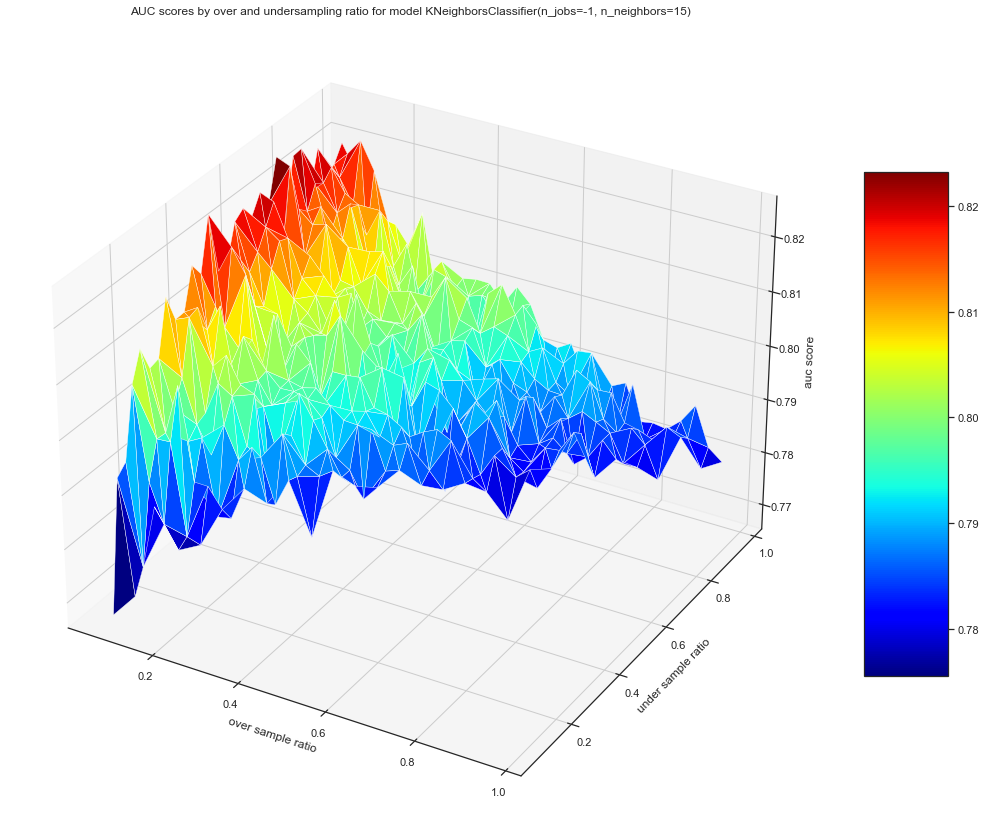

In [48]:
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratios_o[3], ratios_u[3], vect_of_aucs[3], cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {models[3]}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()

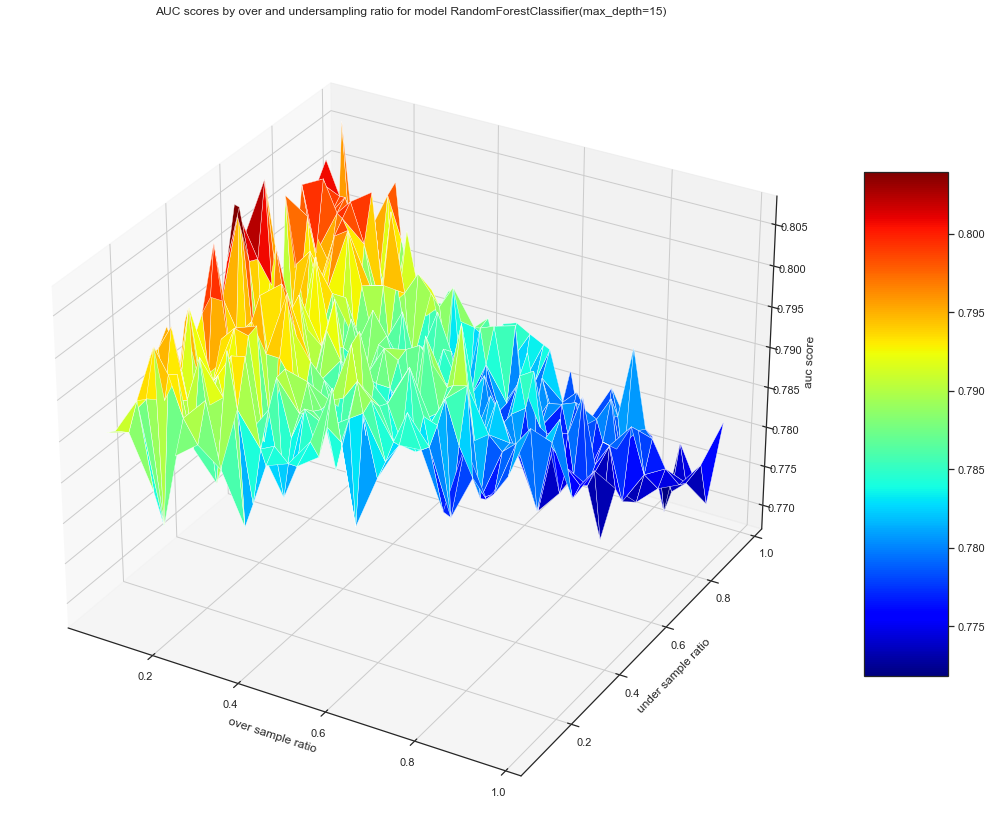

In [49]:
fig = plt.figure(figsize=(14,14))
ax = Axes3D(fig)
surface = ax.plot_trisurf(ratios_o[4], ratios_u[4], vect_of_aucs[4], cmap=cm.jet, linewidth=0.4);
ax.set_xlabel("over sample ratio")
ax.set_ylabel("under sample ratio")
ax.set_zlabel("auc score")
ax.set_title(f"AUC scores by over and undersampling ratio for model {models[4]}")
fig.colorbar(surface, shrink=0.5, aspect=6)
plt.show()

* The series 3d plots above show how each model performs given each combination of over and under sampled ratios. 

<a id='testing-ratios'></a>
### Using these ratios with a test set
* I will now use the ideal ratios to train a new model of each type.
* I will use the same train and test set for each model, but each model will have a different oversample/undersample approach based on ideal ratios extracted by the algorithm
* I will not oversample the test set. Some people tend to make this mistake. It can lead to thinking your model is performing better than it will end up generalizing to new data.

In [64]:
over = SMOTE(sampling_strategy=params[1]) # Setting up an over and undersampling pipeline
under = RandomUnderSampler(sampling_strategy=params[2])
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

over/under sampling class ratio:  Counter({0: 679, 1: 548})


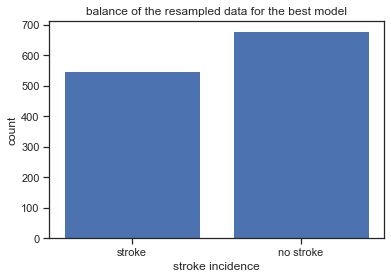

In [65]:
x_train, x_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.3)

logx_train, logy_train = pipeline.fit_resample(x_train, y_train_) ## resampling the training data with our pipeline

counter = Counter(logy_train)
print("over/under sampling class ratio: ",counter)


x = ["stroke", "no stroke"]
y_ = [len(logy_train[logy_train == 1]), len(logy_train[logy_train == 0])]
plt.xlabel("stroke incidence")
plt.ylabel("count")
plt.title("balance of the resampled data for the best model")
plt.bar(x, y_);



#### Above you can see the ideal ratio extracted by the algorithm for the best performing model (logistic regression)

In [66]:
best = bestModel
best.fit(logx_train, logy_train)

print("-"*30)
print(f"METRICS FOR OPTIMAL OVERSAMPLE USING {bestModel}:")

predicted_stroke = best.predict(x_test)
print("auc: ",roc_auc_score(y_test_, best.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))

print("-"*30)

print("-"*30)
print(f"METRICS FOR OPTIMAL OVERSAMPLE USING {models[0]}:")

over = SMOTE(sampling_strategy=.7) # getting best ratios from graph of lda
under = RandomUnderSampler(sampling_strategy=.9)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

# df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
ldax_train, lday_train = pipeline.fit_resample(x_train, y_train_)

lda = models[0]
lda.fit(ldax_train, lday_train)

predicted_stroke = lda.predict(x_test)
print("auc: ",roc_auc_score(y_test_, lda.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))

print("-"*30)
print(f"METRICS FOR OPTIMAL OVERSAMPLE USING {models[2]}:")
over = SMOTE(sampling_strategy=.3) 
under = RandomUnderSampler(sampling_strategy=.85)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

qdax_train, qday_train = pipeline.fit_resample(x_train, y_train_)

qda = models[2]
qda.fit(qdax_train, qday_train)

predicted_stroke = qda.predict(x_test)
print("auc: ",roc_auc_score(y_test_, qda.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))


print("-"*30)
print(f"METRICS FOR OPTIMAL OVERSAMPLE USING {models[3]}:")
over = SMOTE(sampling_strategy=.1) 
under = RandomUnderSampler(sampling_strategy=.8)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

knnx_train, knny_train = pipeline.fit_resample(x_train, y_train_)

knn = models[3]
knn.fit(knnx_train, knny_train)

predicted_stroke = knn.predict(x_test)
print("auc: ",roc_auc_score(y_test_, knn.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))

print("-"*30)
print(f"METRICS FOR OPTIMAL OVERSAMPLE USING {models[4]}:")
over = SMOTE(sampling_strategy=.1) 
under = RandomUnderSampler(sampling_strategy=.8)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

rfx_train, rfy_train = pipeline.fit_resample(x_train, y_train_)

rf = models[4]
rf.fit(rfx_train, rfy_train)

predicted_stroke = rf.predict(x_test)
print("auc: ",roc_auc_score(y_test_, rf.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))


------------------------------
METRICS FOR OPTIMAL OVERSAMPLE USING LogisticRegression():
auc:  0.8442798353909465
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1458
           1       0.15      0.71      0.25        75

    accuracy                           0.79      1533
   macro avg       0.57      0.75      0.56      1533
weighted avg       0.94      0.79      0.85      1533

------------------------------
------------------------------
METRICS FOR OPTIMAL OVERSAMPLE USING LinearDiscriminantAnalysis():
auc:  0.8425057155921353
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1458
           1       0.14      0.76      0.23        75

    accuracy                           0.75      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.75      0.82      1533

------------------------------
METRICS FOR OPTIMAL OVERSAMPLE USING Quadratic

#### The above metrics summarize model performance for each model on the test set

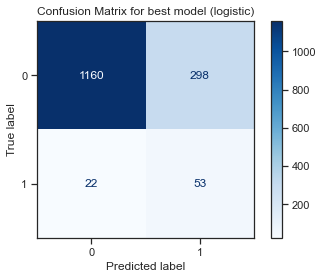

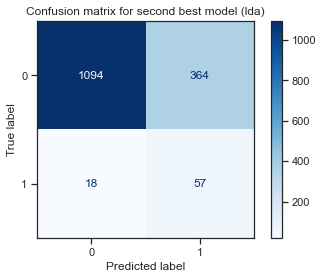

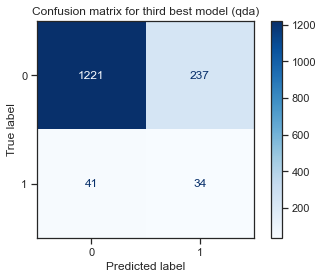

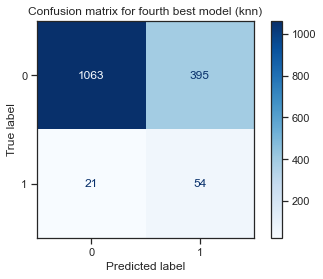

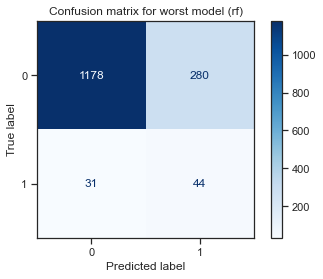

In [67]:

plot_confusion_matrix(best, x_test, y_test_,

                      cmap=plt.cm.Blues)

plt.title("Confusion Matrix for best model (logistic)")
plt.show()

plot_confusion_matrix(lda, x_test, y_test_,

                      cmap=plt.cm.Blues)


plt.title("Confusion matrix for second best model (lda)")
plt.show()

plot_confusion_matrix(qda, x_test, y_test_,

                      cmap=plt.cm.Blues)


plt.title("Confusion matrix for third best model (qda)")


plot_confusion_matrix(knn, x_test, y_test_,

                      cmap=plt.cm.Blues)


plt.title("Confusion matrix for fourth best model (knn)")

plt.show()

plot_confusion_matrix(rf, x_test, y_test_,

                      cmap=plt.cm.Blues)


plt.title("Confusion matrix for worst model (rf)")
plt.show()

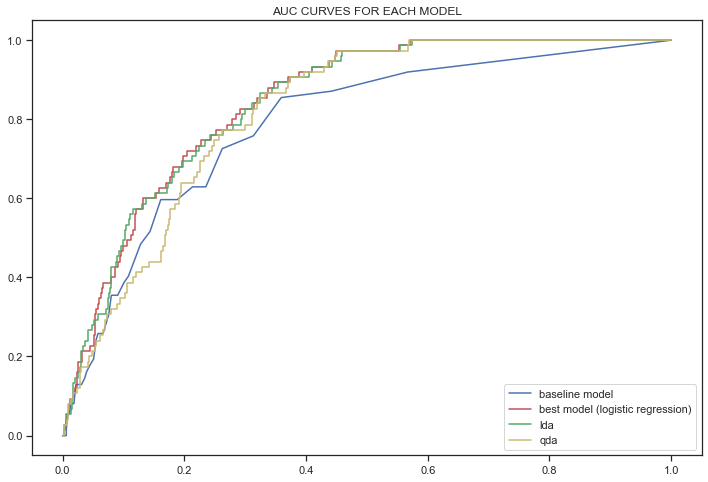

In [68]:
#AUC curves

fig = plt.figure(figsize=(12,8))
plt.plot(fp1,tp1,"-b", label="baseline model");
fp, tp, _ = metrics.roc_curve(y_test_, best.decision_function(x_test))
plt.plot(fp,tp, "-r", label="best model (logistic regression)");
# plt.show();

# plt.title("AUC CURVE FOR lda");
fp, tp, _ = metrics.roc_curve(y_test_, lda.decision_function(x_test))
plt.plot(fp,tp, "-g", label="lda");

# fp, tp, _ = metrics.roc_curve(y_test_, rf.decision_function(x_test))
# plt.plot(fp,tp, "-b", label="rf");

plt.title("AUC CURVES FOR EACH MODEL");
fp, tp, _ = metrics.roc_curve(y_test_, qda.decision_function(x_test))
plt.plot(fp,tp, "-y", label="qda");
plt.legend(loc="lower right");


<a id='auc-improved'></a>
### IMPROVEMENT IN AUC FROM RATIO EXTRACTION
* As you can see above, all the over/under sampled models have better AUC than baseline model. The best model (logistic regression is in red)
* Additionally, the ratio extraction algorithm also provided ratios that give good recall. In the context of predicting stroke, it may be more important to have high recall than accuracy or precision. It is important that people at risk arent given false negative results and their potential stroke does not slip through the cracks.

### Results summary and explanation
* Logistic regression was the best model in terms of auc on this run, but there was variation on other runs. Sometimes LDA performed better.
* KNN was better when k was larger. Even though KNN performance wasn't great, it was useful knowing that high k performed better, since a high k means a more linear class separation
* LDA was almost always best in terms of recall
* LDA requires same variance for each variable, and this was not the case, but they were similar


In [87]:
print(X.age.var()) # variance of each column
print(X.avg_glucose_level.var())
print(X.hypertension.var())
# print(X.gender.var())
print(X.heart_disease.var())

0.07620063248199366
0.04370304641637864
0.08799088255052658
0.0511139078810193


* The 3d ratio plot does show that LDA auc is smoother and potentially more consistent.
* Logistic is best when we can get the perfect ratio, but the ratios are more consistent/forgiving for lda.
* One explanation for these results is that there is a high dimenstional linear/planar split between the classes (based on KNN performing better as k got higher and that QDA performed worse than LDA and logistic).
* Logistic assumptions were met when I removed collinearity. A potential colinearity was removed from X when I removed the ever_married column, which was correlated with bmi and age
* LDA did have the best recall again, which may be important in this context as I have already mentioned


<a id='ensemble-experiments'></a>
## Ensemble Experiments

* Maybe an ensemble of lda and logistic would perform well? Logistic had best AUC and LDA had best recall

In [70]:
def pick(tup):
    if tup[0] > tup[1]:
        return 0
    else: return 1


ensembled_probs = (best.predict_proba(x_test) + lda.predict_proba(x_test))/2
ensembled_preds = np.array(list(map(pick, ensembled_probs)))
print("ENSEMBLE OF BEST TWO MODELS:")
print("auc: ",roc_auc_score(y_test_, ensembled_probs[:,1]))
print(classification_report(y_test_, ensembled_preds))

ENSEMBLE OF BEST TWO MODELS:
auc:  0.8429538180155464
              precision    recall  f1-score   support

           0       0.98      0.77      0.87      1458
           1       0.14      0.75      0.24        75

    accuracy                           0.77      1533
   macro avg       0.56      0.76      0.55      1533
weighted avg       0.94      0.77      0.84      1533



### Not much improvement?
* Not much improvement with a basic ensemble. I tried a various combinations with various weights without significant performance boosts.
* Seems to just average out benefits most of the time


### Best precision + Best Recall models
* One more thing I would like to test is if there is any benefit to an ensemble of the model that has the best precision and the model with the best recall. They may just average eachother out like the above ensemble. But it is worth a try since my cross validated ratio extraction algorithm seemed successfull
* Also I would like to see if I can get higher recall by selecting ratios based on recall scores

In [79]:
def find_optimal_recall_ratio(model,k):
    xs = []
    ys = []
    zs = []
    best_auc = 0
    best_under = 0
    best_over = 0
    for i in range(1, 31):
        for j in range(1, 31):
            ratio_over = i/31
            ratio_under = j/31
            try:
                over = SMOTE(sampling_strategy=ratio_over)
                under = RandomUnderSampler(sampling_strategy=ratio_under)
                steps = [('over', over), ('under', under)]                        
                pipeline = Pipeline(steps=steps)
          
                auc = 0
                a = 0
                kf = StratifiedKFold(n_splits=k) ## Cross validation
                for train_index, test_index in kf.split(X, y):
                    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:] 
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                    X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train) # over sampling the training data
                    m = model
                    m.fit(X_train_bal, y_train_bal)
                    predicted_stroke = m.predict(X_test)
                    a = metrics.recall_score(y_test, predicted_stroke)
                    auc += a
                
                auc = auc/k # averaging the auc score for a models crossval auc
                if auc > best_auc:
                    best_auc = auc
                    best_over = ratio_over
                    best_under = ratio_under
                    best_m = m # best model trained on ideal ratio
                xs.append(ratio_over)
                ys.append(auc)
                zs.append(ratio_under)
            except Exception as e:
                continue
    
    return np.array(xs), np.array(ys), np.array(zs), (best_auc, best_over, best_under), best_m

max_auc = 0
params = 0
auc_vect = []
ratio_over = []
ration_under = []
ratios_o = []
ratios_u = []
vect_of_aucs = []
models = []
bestModel = None

for model in [LinearDiscriminantAnalysis(), 
              LogisticRegression(), 
              QuadraticDiscriminantAnalysis(),
              KNeighborsClassifier(n_neighbors=15, n_jobs=-1), RandomForestClassifier(max_depth=15)
              ]:
    
    ratio_over, aucs, ratio_under, bests, m = find_optimal_recall_ratio(model, 5)  
    print(f"model {m}, had best recall: {bests[0]} with over_ratio = {bests[1]} and under_ratio = {bests[2]}")
    if bests[0] > max_auc:
        max_auc = bests[0]
        params = bests
        auc_vect = aucs
        ratio_over = ratio_over
        ratio_under = ratio_under
        bestModel = m
    ratios_o.append(ratio_over)
    ratios_u.append(ratio_under)
    vect_of_aucs.append(aucs)
    models.append(m)
print(f"Best model in terms of recall was  {bestModel}")

model LinearDiscriminantAnalysis(), had best recall: 0.8352653061224491 with over_ratio = 0.2903225806451613 and under_ratio = 0.967741935483871
model LogisticRegression(), had best recall: 0.8031836734693878 with over_ratio = 0.22580645161290322 and under_ratio = 0.967741935483871
model QuadraticDiscriminantAnalysis(), had best recall: 0.7711020408163265 with over_ratio = 0.3225806451612903 and under_ratio = 0.967741935483871
model KNeighborsClassifier(n_jobs=-1, n_neighbors=15), had best recall: 0.8271836734693878 with over_ratio = 0.06451612903225806 and under_ratio = 0.967741935483871
model RandomForestClassifier(max_depth=15), had best recall: 0.7466938775510205 with over_ratio = 0.06451612903225806 and under_ratio = 0.967741935483871
Best model in terms of recall was  LinearDiscriminantAnalysis()


In [80]:
def find_optimal_precision_ratio(model,k):
    xs = []
    ys = []
    zs = []
    best_auc = 0
    best_under = 0
    best_over = 0
    for i in range(1, 31):
        for j in range(1, 31):
            ratio_over = i/31
            ratio_under = j/31
            try:
                over = SMOTE(sampling_strategy=ratio_over)
                under = RandomUnderSampler(sampling_strategy=ratio_under)
                steps = [('over', over), ('under', under)]                        
                pipeline = Pipeline(steps=steps)
          
               
                auc = 0
                a = 0
               
                kf = StratifiedKFold(n_splits=k) ## Cross validation
                for train_index, test_index in kf.split(X, y):

                    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:] 

                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                    
                    X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train) # over sampling the training data

                    m = model
                    m.fit(X_train_bal, y_train_bal)
                    predicted_stroke = m.predict(X_test)
                    a = metrics.precision_score(y_test, predicted_stroke)
                    auc += a
                
                auc = auc/k # averaging the auc score for a models crossval auc
                
#                 auc = metrics.recall_score(y_test, predicted_stroke)
                if auc > best_auc:
                    best_auc = auc
                    best_over = ratio_over
                    best_under = ratio_under
                    best_m = m # best model trained on ideal ratio
                xs.append(ratio_over)
                ys.append(auc)
                zs.append(ratio_under)
            except Exception as e:
#                 print(e)
                continue
    
    return np.array(xs), np.array(ys), np.array(zs), (best_auc, best_over, best_under), best_m

max_auc = 0
params = 0
auc_vect = []
ratio_over = []
ration_under = []
ratios_o = []
ratios_u = []
vect_of_aucs = []
models = []
bestModel = None

for model in [LinearDiscriminantAnalysis(), 
              LogisticRegression(), 
              QuadraticDiscriminantAnalysis(),
              KNeighborsClassifier(n_neighbors=15, n_jobs=-1), RandomForestClassifier(max_depth=15)
              ]:
    
    ratio_over, aucs, ratio_under, bests, m = find_optimal_precision_ratio(model, 5)  
    print(f"model {m}, had best precision: {bests[0]} with over_ratio = {bests[1]} and under_ratio = {bests[2]}")
    if bests[0] > max_auc:
        max_auc = bests[0]
        params = bests
        auc_vect = aucs
        ratio_over = ratio_over
        ratio_under = ratio_under
        bestModel = m
    ratios_o.append(ratio_over)
    ratios_u.append(ratio_under)
    vect_of_aucs.append(aucs)
    models.append(m)
print(f"Best model in terms of precision was  {bestModel}")

model LinearDiscriminantAnalysis(), had best precision: 0.26269005847953214 with over_ratio = 0.0967741935483871 and under_ratio = 0.0967741935483871
model LogisticRegression(), had best precision: 0.26666666666666666 with over_ratio = 0.06451612903225806 and under_ratio = 0.06451612903225806
model QuadraticDiscriminantAnalysis(), had best precision: 0.16620205456751483 with over_ratio = 0.06451612903225806 and under_ratio = 0.06451612903225806
model KNeighborsClassifier(n_jobs=-1, n_neighbors=15), had best precision: 0.26666666666666666 with over_ratio = 0.06451612903225806 and under_ratio = 0.06451612903225806
model RandomForestClassifier(max_depth=15), had best precision: 0.2145238095238095 with over_ratio = 0.06451612903225806 and under_ratio = 0.06451612903225806
Best model in terms of precision was  LogisticRegression()


### Best precision and best recall models

In [81]:
print(f"METRICS FOR OPTIMAL RECALL OVERSAMPLE USING {LinearDiscriminantAnalysis()}:")

over = SMOTE(sampling_strategy=0.064) # getting best ratios from graph of lda
under = RandomUnderSampler(sampling_strategy=.935)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

# df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
recallx_train, recally_train = pipeline.fit_resample(x_train, y_train_)

r_lda = LinearDiscriminantAnalysis()
r_lda.fit(recallx_train, recally_train)

predicted_stroke = r_lda.predict(x_test)
print("auc: ",roc_auc_score(y_test_, r_lda.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))

print("-"*30)
print(f"METRICS FOR OPTIMAL PRECISION OVERSAMPLE USING {LogisticRegression()}:")
over = SMOTE(sampling_strategy=.096) 
under = RandomUnderSampler(sampling_strategy=.129)
steps = [('over', over), ('under', under)]                         
pipeline = Pipeline(steps=steps)

precisionx_train, precisiony_train = pipeline.fit_resample(x_train, y_train_)

p_lr = LogisticRegression()
p_lr.fit(precisionx_train, precisiony_train)

predicted_stroke = p_lr.predict(x_test)
print("auc: ",roc_auc_score(y_test_, p_lr.predict_proba(x_test)[:,1]))
print(classification_report(y_test_, predicted_stroke))


print("-"*30)

METRICS FOR OPTIMAL RECALL OVERSAMPLE USING LinearDiscriminantAnalysis():
auc:  0.8360859625057157
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1458
           1       0.13      0.77      0.22        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.74      0.81      1533

------------------------------
METRICS FOR OPTIMAL PRECISION OVERSAMPLE USING LogisticRegression():
auc:  0.8429538180155464
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.25      0.04      0.07        75

    accuracy                           0.95      1533
   macro avg       0.60      0.52      0.52      1533
weighted avg       0.92      0.95      0.93      1533

------------------------------


### Ensemble of the two

In [83]:
ensembled_probs = (p_lr.predict_proba(x_test) + r_lda.predict_proba(x_test))/2
ensembled_preds = np.array(list(map(pick, ensembled_probs)))
print("ENSEMBLE OF BEST TWO MODELS:")
print("auc: ",roc_auc_score(y_test_, ensembled_probs[:,1]))
print(classification_report(y_test_, ensembled_preds))

ENSEMBLE OF BEST TWO MODELS:
auc:  0.8390855052583448
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1458
           1       0.20      0.52      0.29        75

    accuracy                           0.88      1533
   macro avg       0.59      0.71      0.61      1533
weighted avg       0.94      0.88      0.90      1533



#### It is understandable that this model isnt very good, because the precision based model is a failure
* Even after checking the potential ratios for best precision, most of the time these models had precision < .3


### But what if we try an ensemble of the recall based lda model, and our best auc model?

In [85]:
from scipy import stats
ensembled_probs = (best.predict_proba(x_test) + r_lda.predict_proba(x_test))/2
ensembled_preds = np.array(list(map(pick, ensembled_probs)))
print("ENSEMBLE OF BEST MODEL AND BEST RECALL MODEL:")
print("auc: ",roc_auc_score(y_test_, ensembled_probs[:,1]))
print(classification_report(y_test_, ensembled_preds))
print("-"*30)
print("BEST MODEL BASED ON AUC:")
print("-"*30)

probs = best.predict_proba(x_test)[:,1]


### EXTRACTING LOGISTIC MODEL PARAMETERS 
### https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
params = np.append(best.intercept_,best.coef_)
predictions = best.predict(x_test)

newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
MSE = (sum((y_test_-predictions)**2))/(len(newX)-len(newX[0]))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]

print("auc: ",roc_auc_score(y_test_, probs))
print(classification_report(y_test_, predictions))

print("-"*30)
print("Original LDA MODEL:")
print("-"*30)

probs = lda.predict_proba(x_test)[:,1]


### EXTRACTING LOGISTIC MODEL PARAMETERS 
### https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
params = np.append(lda.intercept_,lda.coef_)
predictions = lda.predict(x_test)

newX = np.append(np.ones((len(x_test),1)), x_test, axis=1)
MSE = (sum((y_test_-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF4 = pd.DataFrame()
myDF4["Coefficients"],myDF4["Standard Errors"],myDF4["t values"],myDF4["Probabilities"] = [params,sd_b,ts_b,p_values]

print("auc: ",roc_auc_score(y_test_, probs))
print(classification_report(y_test_, predictions))


ENSEMBLE OF BEST MODEL AND BEST RECALL MODEL:
auc:  0.8410059442158208
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1458
           1       0.14      0.75      0.23        75

    accuracy                           0.76      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.76      0.82      1533

------------------------------
BEST MODEL BASED ON AUC:
------------------------------
auc:  0.8442798353909465
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1458
           1       0.15      0.71      0.25        75

    accuracy                           0.79      1533
   macro avg       0.57      0.75      0.56      1533
weighted avg       0.94      0.79      0.85      1533

------------------------------
Original LDA MODEL:
------------------------------
auc:  0.8425057155921353
              precision    recall  f1-score   support

 

<a id='conclusions'></a>
## Conclusions and model choice:
* No dice on the ensembles. They tended average eachother out most of the time and were not very consistent
* The two candidates for best model in my opinion are the logistic regression model with best AUC and the original LDA model with second best AUC.
* The original LDA model has better recall than the logistic model.
* The logistic model has slightly higher AUC and better accuracy.
* As mentioned before, LDA's smoother, more consistent results with different over and under sampling ratios (3d plots), the fact that it tended to have the best recall, and that it also has model parameters we can examine the significance of (like logistic), makes it a good choice.
* Logistic often got best AUC results when we simulate all possible ratios against it, but it had a less smooth 3d auc plot than LDA and was less consistent.
* The ensemble of the best AUC model and best recall model gives similar AUC to the best auc model, on some runs, while increasing the minority class' recall, but it was not as consistent as the original plain LDA.
* Most of the time the best recall model was actually a knn model. An ensemble including a knn model is not as good for inference. LDA and logistic regression are easy to interpret with their significance levels for their parameters and their coefficients. KNN is more of a black box, and it was the logistic and lda models' ability to extract predictor significance that led me to drop bmi, gender and residence type.


In [89]:
print("-"*30)
print("PARAMETERS FOR BEST AUC LOGISTIC REGRESSION MODEL:")
print("-"*30)
print(myDF3)
print("-"*30)
print("PARAMETERS FOR ORIGINAL LDA MODEL:")
print("-"*30)
print(myDF4)

------------------------------
PARAMETERS FOR BEST AUC LOGISTIC REGRESSION MODEL:
------------------------------
   Coefficients  Standard Errors  t values  Probabilities
0       -4.5181            0.027  -167.780            0.0
1        5.5475            0.046   121.542            0.0
2        1.0512            0.059    17.807            0.0
3        0.3125            0.043     7.264            0.0
4        0.2133            0.056     3.788            0.0
------------------------------
PARAMETERS FOR ORIGINAL LDA MODEL:
------------------------------
   Coefficients  Standard Errors  t values  Probabilities
0       -4.5671            0.029  -155.225            0.0
1        5.7402            0.050   115.107            0.0
2        1.2957            0.064    20.089            0.0
3        0.6804            0.047    14.475            0.0
4        0.4097            0.062     6.661            0.0


In [88]:
X.head()

age  avg_glucose_level  hypertension  heart_disease
0  0.816895           0.801265           0.0            1.0
1  0.743652           0.679023           0.0            0.0
2  0.975586           0.234512           0.0            1.0
3  0.597168           0.536008           0.0            0.0
4  0.963379           0.549349           1.0            0.0

* Ultimately these models each have their strengths and we have to make a trade off with either choice
* For the purpost of identifying potential stroke risk, I would choose the original LDA model. It has an increased recall score, but also a somewhat high auc. Like the logistic model, it has interpretable parameters. Even though the accuracy is lower, it may be more important to have a somewhat balanced auc and high recall to prevent strokes from slipping through the cracks. 

### Suggestions for future work and improvement
* Neural networks and deep learning solutions may be better for handling the class imbalance.
* More data with more stroke examples added to the dataset would help with the class imbalance.


#### References that I found helpful:
* One hot and dummy var encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
* Class imbalance resolution SMOTE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* Parameter significance: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
